MNIST handwritten Digit Classification

Importing the Dependencies

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # openCV library
from google.colab.patches import cv2_imshow  # present in cv2 however google restrictions does not allow to use it directly (only for colab)
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(5)  # randomness restricted

Loading the MNIST data from keras.datasets

In [250]:
(x_train, y_train), (x_test, y_test) = mnist.load_data("mnist.npz") # preprocesing already done

In [251]:
type(x_train) # conversion to numpy also done

numpy.ndarray

In [252]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# contains 60000 train images
# 10000 test images
# dimensions 28*28
# grey scale images asther is one channel and not 3 in case of RGB

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [253]:
print(x_train[20])
print(x_train[20].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

4


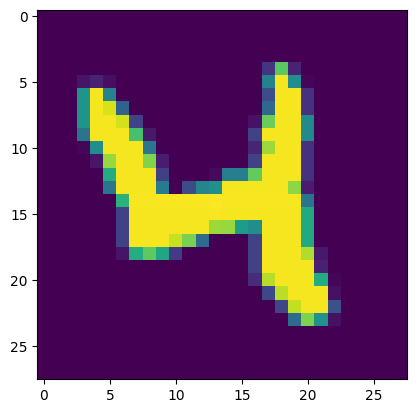

In [254]:
plt.imshow(x_train[20])
plt.show

print(y_train[20])

Image Labels

In [255]:
print(y_train.shape, y_test.shape)

print(np.unique(y_train))
print(np.unique(y_test))

(60000,) (10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


normaliizing the scale

In [256]:
x_train = x_train/255
x_test = x_test/255

print(x_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [257]:
import tensorflow as tf

x_train = tf.image.per_image_standardization(x_train)
x_test = tf.image.per_image_standardization(x_test)

Model Training (Neural Network)

In [258]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # cannot input a 2-D array therefore it must be linearized into a line
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [259]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8781 - loss: 0.4011
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1262
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9771 - loss: 0.0732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9806 - loss: 0.0618
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9853 - loss: 0.0443
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0410
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9879 - loss: 0.0358
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9893 - loss: 0.0335


Model Evaluation

In [260]:
loss, accuracy = model.evaluate(x_test, y_test)  # our model is not overfitting, as the accuracy on the test data is also high
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1684
Loss: 0.14237567782402039
Accuracy: 0.9693999886512756


taking one individual value

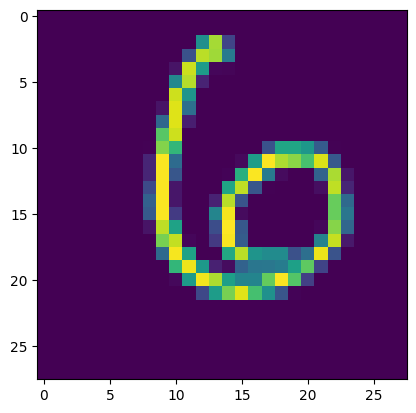

In [261]:
plt.imshow(x_test[100])
plt.show()

In [262]:
print(f"Actual Value: [{y_test[100]}]")

pred_100 = model.predict(x_test)[100]

print(f"Predicted Value: {pred_100}")
# output is probabilty of the 10 available classes ie 0-9
# position with the highest value indicates the prediction with highest probability
print(f"Predicted Answer: {np.argmax(pred_100)}")

Actual Value: [6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Value: [9.8536336e-01 1.1711694e-05 4.7398275e-03 7.5477529e-01 1.6537176e-02
 9.9930286e-01 1.0000000e+00 1.1755958e-03 5.7523274e-01 6.7604842e-06]
Predicted Answer: 6


Confusion Matrix

In [263]:
y_prediction = model.predict(x_test)

#y_pred_ans = []
#for i in range (len(y_prediction)):
#  ans = np.argmax(y_prediction[i])
#  y_pred_ans.append(ans)

y_pred_ans = [np.argmax(i) for i in y_prediction]
conf_mat = confusion_matrix(y_test, y_pred_ans)

print(y_pred_ans)
print(conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 1, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', square=True)   # fmt='d' indicates that all values shouild be in integers
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

Building a predictive System

In [ ]:
input1_img_path = '/content/sample_image-300x298.webp'

input1_img = cv2.imread(input1_img_path)

In [ ]:
print(type(input1_img))
print(input1_img.shape) # read in as RGB image

In [ ]:
cv2_imshow(input1_img)

In [ ]:
input1_greyscale_img = cv2.cvtColor(input1_img, cv2.COLOR_RGB2GRAY)   # converting RGB to greyscale
input1_greyscale_img.shape

In [ ]:
input1_img_resize = cv2.resize(input1_greyscale_img, (28,28))      # resizing the image as pre input of our NN
input1_img_resize.shape

In [ ]:
cv2_imshow(input1_img_resize)

In [ ]:
input1_image_resized = input1_img_resize/255   # normalization like before

In [ ]:
image1_reshaped = np.reshape(input1_image_resized, [1,28,28])
# this indicates that we are only one image as input

In [ ]:
input1_prediction = model.predict(image1_reshaped)
print(input1_prediction)
print(f"Predicted value: {np.argmax(input1_prediction)}")

Creating a System

In [ ]:
#input_img_path = input("Enter path of the image: ")
#input_img = cv2.imread(input_img_path)
#grayscale_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
#input_img_resize = cv2.resize(grayscale_img, (28,28))
#input_img_resized = input_img_resize/255
#image_reshaped = np.reshape(input_img_resized, [1,28,28])
#input_prediction = model.predict(image_reshaped)
#print(f"the handwritten image is: {np.argmax(input_prediction)}")
